## Praca domowa nr 7, Bartosz Jamrozy

In [1]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

In [2]:
def count_clustering_scores(X, cluster_num, model, score_fun):

    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_components=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

In [3]:
wine_train=pd.read_csv("train.csv")
wine_test=pd.read_csv("test.csv")
wine_val=pd.read_csv("val.csv")

In [4]:
wine_train.head() 

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,12.72,1.75,2.28,22.5,84,1.38,1.76,0.48,1.63,3.30,0.88,2.42,488
1,13.23,3.30,2.28,18.5,98,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675
2,12.58,1.29,2.10,20.0,103,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640
3,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510
4,13.84,4.12,2.38,19.5,89,1.80,0.83,0.48,1.56,9.01,0.57,1.64,480


In [5]:
wine_test.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0,13.34,0.94,2.36,17.0,110,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750
1,0,12.00,0.92,2.00,19.0,86,2.42,2.26,0.30,1.43,2.50,1.38,3.12,278
2,0,11.84,0.89,2.58,18.0,94,2.20,2.21,0.22,2.35,3.05,0.79,3.08,520
3,0,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937
4,0,11.81,2.12,2.74,21.5,134,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625


In [6]:
wine_val.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410
1,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
2,12.82,3.37,2.30,19.5,88,1.48,0.66,0.40,0.97,10.26,0.72,1.75,685
3,12.37,1.07,2.10,18.5,88,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660
4,13.50,1.81,2.61,20.0,96,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845


In [7]:
wine_test_drop= wine_test.drop("class",axis=1)
wine_test_drop.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,13.34,0.94,2.36,17.0,110,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750
1,12.00,0.92,2.00,19.0,86,2.42,2.26,0.30,1.43,2.50,1.38,3.12,278
2,11.84,0.89,2.58,18.0,94,2.20,2.21,0.22,2.35,3.05,0.79,3.08,520
3,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937
4,11.81,2.12,2.74,21.5,134,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625


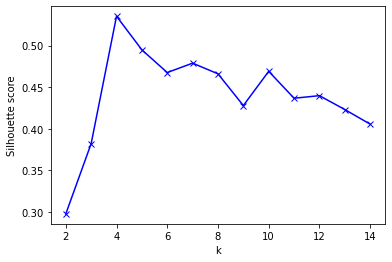

In [8]:
from sklearn.metrics import silhouette_score

cluster_num_seq = range(2, 15)
silhouette_vec = count_clustering_scores(wine_train, cluster_num_seq, GaussianMixture, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

By dobrać odpowiednią liczne klastrów dla naszego zbioru, posłużymy się miarą silhouette.
Z wykresu odczytać można ze optymalną liczbą komponentów dla GMM i win jest liczba 3. 
Odpowiednia liczba klastrów jest ważna z tego powodu ze skupiamy poprawne obserwacje robiąc „miejsce” na wartości odstających.

In [9]:
gm = GaussianMixture(n_components=3).fit(wine_train)

Teraz można dobrać progi dla uznania wartości za ostającą.

In [10]:
tr_min= min(gm.score_samples(wine_train))
tr_max= max(gm.score_samples(wine_train))

In [11]:
tr_min,tr_max

(-26.505589777592775, 1.6533538671557937)

In [12]:
wine_test_drop=wine_test.drop("class",axis=1)
wine_test_class=wine_test["class"]
wine_test_score=gm.score_samples(wine_test_drop)
for i,k in enumerate(wine_test_score):
    if k < tr_min or k > tr_max:
        wine_test_score[i]=1
    else: wine_test_score[i]=0    

In [13]:
wine_test_score # GMM

array([1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1.])

In [14]:
wine_test_class # orginał

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    1
13    1
14    1
15    1
16    1
Name: class, dtype: int64

In [15]:
print("f1_scor ", f1_score(wine_test_score, wine_test_class))
print("precision_score ", precision_score(wine_test_score, wine_test_class))
print("recall_score ", recall_score(wine_test_score, wine_test_class))

f1_scor  0.7142857142857143
precision_score  1.0
recall_score  0.5555555555555556


Jak widać GMM ma potencjał do wykrywania wartości odstających. Jednak ta konkretna instancja na domyślnych parametrach jest dość słaba. Poprawnie określa outliery za outliery ale ma spory problem z poprawnymi przypadkami.